<a href="https://colab.research.google.com/github/jamessat/neural-networks-demo/blob/main/simple_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create a much simpler example of a neural network from scratch in Python, without using high-level libraries like TensorFlow, PyTorch, or Keras, to illustrate the core concepts of neural networks (data preparation, forward propagation, loss calculation, backward propagation, optimization, training, and evaluation) using a small, easily visualizable dataset.

## Generate or load simple data

### Subtask:
Create a small, simple dataset (e.g., 2 features, 2 classes) that is easy to visualize.


**Reasoning**:
The subtask requires generating a simple dataset using `make_moons` from `sklearn.datasets`. This involves importing the function and then calling it with the specified parameters to create the features and labels.



In [13]:
from sklearn.datasets import make_moons

# Generate the dataset
X, y = make_moons(n_samples=100, noise=0.10, random_state=42)

print("Shape of features (X):", X.shape)
print("Shape of labels (y):", y.shape)

Shape of features (X): (100, 2)
Shape of labels (y): (100,)


## Initialize simple network parameters

### Subtask:
Initialize weights and biases for a single-layer or a very simple two-layer network.


**Reasoning**:
Define the network architecture and initialize the weights and biases for a two-layer network.



In [14]:
# Define the network architecture
input_size_simple = X.shape[1]  # Number of features in the simple dataset
hidden_size_simple = 5  # Choose a small number of hidden units
output_size_simple = 2  # Number of classes in the simple dataset (0 and 1)

# Initialize weights and biases for the simple network
# Weights are initialized with small random values
W1_simple = np.random.randn(input_size_simple, hidden_size_simple) * 0.01
# Biases are initialized with zeros
b1_simple = np.zeros((1, hidden_size_simple))

# Weights for hidden to output layer
W2_simple = np.random.randn(hidden_size_simple, output_size_simple) * 0.01
# Biases for output layer
b2_simple = np.zeros((1, output_size_simple))

print("Shapes of initialized parameters for the simple network:")
print("W1_simple:", W1_simple.shape)
print("b1_simple:", b1_simple.shape)
print("W2_simple:", W2_simple.shape)
print("b2_simple:", b2_simple.shape)

Shapes of initialized parameters for the simple network:
W1_simple: (2, 5)
b1_simple: (1, 5)
W2_simple: (5, 2)
b2_simple: (1, 2)


## Implement simple activation functions

### Subtask:
Implement the necessary activation functions (e.g., Sigmoid or ReLU).


**Reasoning**:
Implement the sigmoid and ReLU activation functions as requested.



In [15]:
def sigmoid(Z):
    """
    Implement the Sigmoid activation function.

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- Output of sigmoid(Z), same shape as Z
    """
    A = 1 / (1 + np.exp(-Z))
    return A

def relu(Z):
    """
    Implement the ReLU activation function.

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- Output of relu(Z), same shape as Z
    """
    A = np.maximum(0, Z)
    return A

print("Sigmoid and ReLU activation functions are defined.")

Sigmoid and ReLU activation functions are defined.


## Implement forward propagation (simple)

### Subtask:
Build the forward pass for the simple network.


**Reasoning**:
Define the forward propagation function for the simple neural network, including the linear transformations, ReLU activation for the hidden layer, and Softmax activation for the output layer.



In [16]:
def forward_propagation_simple(X, W1_simple, b1_simple, W2_simple, b2_simple):
    """
    Implement forward propagation for the simple two-layer neural network.

    Arguments:
    X -- input data (number of examples, input size)
    W1_simple -- weights for the hidden layer (input size, hidden size)
    b1_simple -- biases for the hidden layer (1, hidden size)
    W2_simple -- weights for the output layer (hidden size, output size)
    b2_simple -- biases for the output layer (1, output size)

    Returns:
    A2_simple -- the output of the softmax activation, also known as the post-activation value of the second layer
    cache_simple -- a dictionary containing "Z1_simple", "A1_simple", "Z2_simple" needed for the backward pass
    """
    # Layer 1: Linear -> ReLU
    Z1_simple = X @ W1_simple + b1_simple
    A1_simple = relu(Z1_simple) # Reusing the relu function defined earlier

    # Layer 2: Linear -> Softmax
    Z2_simple = A1_simple @ W2_simple + b2_simple
    A2_simple = softmax(Z2_simple) # Reusing the softmax function defined earlier

    cache_simple = {"Z1_simple": Z1_simple,
                    "A1_simple": A1_simple,
                    "Z2_simple": Z2_simple,
                    "A2_simple": A2_simple}

    return A2_simple, cache_simple

print("forward_propagation_simple function defined.")

forward_propagation_simple function defined.


## Implement loss function (simple)

### Subtask:
Implement a suitable loss function (e.g., Binary Cross-Entropy for binary classification).


**Reasoning**:
Implement the compute_loss_simple function as requested, which calculates the binary cross-entropy loss for the simple network's output.



In [17]:
def compute_loss_simple(A2_simple, Y_simple):
    """
    Computes the binary cross-entropy loss for the simple network.

    Arguments:
    A2_simple -- The output of the softmax activation (shape: (number of examples, num_classes))
    Y_simple -- The true labels (shape: (number of examples,)) - integer class labels

    Returns:
    loss -- The binary cross-entropy loss
    """
    m = Y_simple.shape[0] # Number of examples
    num_classes_simple = A2_simple.shape[1] # Number of classes (should be 2)

    # Convert integer labels to one-hot encoding
    Y_one_hot_simple = one_hot_encode(Y_simple, num_classes_simple)

    # Avoid log(0) by clipping probabilities
    epsilon = 1e-12
    A2_simple = np.clip(A2_simple, epsilon, 1. - epsilon)

    # Calculate binary cross-entropy loss
    # Note: For multi-class classification with Softmax output, the cross-entropy loss
    # formula is -sum(Y * log(A2)) over all classes and examples.
    # For binary classification (2 classes), this is equivalent to binary cross-entropy.
    loss = -np.sum(Y_one_hot_simple * np.log(A2_simple)) / m

    return loss

print("compute_loss_simple function defined.")

compute_loss_simple function defined.


## Implement backward propagation (simple)

### Subtask:
Build the backward pass for the simple network.


**Reasoning**:
Implement the backward propagation function for the simple network as described in the instructions.



In [18]:
def backward_propagation_simple(X, Y, cache_simple, W2_simple):
    """
    Implement the backward propagation for the simple two-layer neural network.

    Arguments:
    X -- input data (number of examples, input size)
    Y -- true labels (number of examples,) - integer class labels
    cache_simple -- dictionary containing "Z1_simple", "A1_simple", "Z2_simple", "A2_simple" from the forward pass
    W2_simple -- weights of the output layer (hidden size, output size)

    Returns:
    grads_simple -- a dictionary with the gradients with respect to W1_simple, b1_simple, W2_simple, and b2_simple
    """
    m = X.shape[0] # Number of examples
    num_classes_simple = W2_simple.shape[1] # Number of output classes

    A1_simple = cache_simple["A1_simple"]
    A2_simple = cache_simple["A2_simple"]
    Z1_simple = cache_simple["Z1_simple"]
    Z2_simple = cache_simple["Z2_simple"]

    # Convert integer labels to one-hot encoding for gradient calculation
    Y_one_hot_simple = one_hot_encode(Y, num_classes_simple)

    # Backward pass for the output layer (Linear -> Softmax)
    # The derivative of the loss with respect to Z2 is A2 - Y for cross-entropy loss with Softmax
    dZ2_simple = A2_simple - Y_one_hot_simple

    # Gradients for W2 and b2
    dW2_simple = (A1_simple.T @ dZ2_simple) / m
    db2_simple = np.sum(dZ2_simple, axis=0, keepdims=True) / m

    # Backward pass for the hidden layer (Linear -> ReLU)
    # Gradient of loss with respect to A1
    dA1_simple = dZ2_simple @ W2_simple.T

    # Gradient of loss with respect to Z1 (using ReLU backward)
    # We need to define relu_backward if it's not already defined.
    # Assuming relu_backward is already defined from the main network implementation
    dZ1_simple = relu_backward(dA1_simple, Z1_simple)

    # Gradients for W1 and b1
    dW1_simple = (X.T @ dZ1_simple) / m
    db1_simple = np.sum(dZ1_simple, axis=0, keepdims=True) / m

    grads_simple = {"dW1_simple": dW1_simple,
                    "db1_simple": db1_simple,
                    "dW2_simple": dW2_simple,
                    "db2_simple": db2_simple}

    return grads_simple

print("backward_propagation_simple function defined.")

backward_propagation_simple function defined.


## Implement optimization (simple sgd)

### Subtask:
Implement a basic SGD update rule.


**Reasoning**:
Implement the simple SGD update rule function as requested.



In [19]:
def update_parameters_simple(W1_simple, b1_simple, W2_simple, b2_simple, grads_simple, learning_rate):
    """
    Updates parameters for the simple network using the gradient descent update rule.

    Arguments:
    W1_simple -- weights matrix of shape (input_size, hidden_size)
    b1_simple -- bias vector of shape (1, hidden_size)
    W2_simple -- weights matrix of shape (hidden_size, output_size)
    b2_simple -- bias vector of shape (1, output_size)
    grads_simple -- python dictionary containing gradients with respect to weights and biases
    learning_rate -- the learning rate for the update rule

    Returns:
    parameters_simple -- python dictionary containing the updated parameters
    """
    # Retrieve gradients from grads_simple dictionary
    dW1_simple = grads_simple["dW1_simple"]
    db1_simple = grads_simple["db1_simple"]
    dW2_simple = grads_simple["dW2_simple"]
    db2_simple = grads_simple["db2_simple"]

    # Implement the SGD update rule for each parameter
    W1_simple = W1_simple - learning_rate * dW1_simple
    b1_simple = b1_simple - learning_rate * db1_simple
    W2_simple = W2_simple - learning_rate * dW2_simple
    b2_simple = b2_simple - learning_rate * db2_simple

    # Return a dictionary containing the updated parameters
    parameters_simple = {"W1_simple": W1_simple,
                         "b1_simple": b1_simple,
                         "W2_simple": W2_simple,
                         "b2_simple": b2_simple}

    return parameters_simple

# Print a confirmation message
print("update_parameters_simple function defined.")

update_parameters_simple function defined.


## Train the simple model

### Subtask:
Train the simple network on the generated data.


**Reasoning**:
Implement the training loop for the simple neural network, including forward propagation, loss calculation, backward propagation, and parameter updates, and print the loss periodically.



In [20]:
# Define hyperparameters for simple model training
num_epochs_simple = 10000
learning_rate_simple = 0.01

# Initialize parameters for the simple network
# Reuse the initialization logic from the "Initialize simple network parameters" step
W1_simple = np.random.randn(input_size_simple, hidden_size_simple) * 0.01
b1_simple = np.zeros((1, hidden_size_simple))
W2_simple = np.random.randn(hidden_size_simple, output_size_simple) * 0.01
b2_simple = np.zeros((1, output_size_simple))

# Create an empty list to store the loss values
losses_simple = []

# Training loop
for i in range(num_epochs_simple):

    # Forward propagation
    A2_simple, cache_simple = forward_propagation_simple(X, W1_simple, b1_simple, W2_simple, b2_simple)

    # Compute loss
    loss_simple = compute_loss_simple(A2_simple, y)
    losses_simple.append(loss_simple)

    # Backward propagation
    grads_simple = backward_propagation_simple(X, y, cache_simple, W2_simple)

    # Update parameters
    parameters_simple = update_parameters_simple(W1_simple, b1_simple, W2_simple, b2_simple, grads_simple, learning_rate_simple)

    W1_simple = parameters_simple["W1_simple"]
    b1_simple = parameters_simple["b1_simple"]
    W2_simple = parameters_simple["W2_simple"]
    b2_simple = parameters_simple["b2_simple"]

    # Print loss every 1000 epochs
    if i % 1000 == 0:
        print(f"Loss after epoch {i}: {loss_simple}")

print("\nSimple model training finished.")

Loss after epoch 0: 0.6932198879664068
Loss after epoch 1000: 0.6849239492482551
Loss after epoch 2000: 0.42168238191059315
Loss after epoch 3000: 0.3145709762480146
Loss after epoch 4000: 0.2934227475024925
Loss after epoch 5000: 0.28651301183735206
Loss after epoch 6000: 0.2833618985953969
Loss after epoch 7000: 0.2815636366476742
Loss after epoch 8000: 0.2805106411155108
Loss after epoch 9000: 0.2797814452509776

Simple model training finished.


## Evaluate the simple model

### Subtask:
Evaluate the model's performance.


**Reasoning**:
Implement the prediction and evaluation functions for the simple model and then use them to calculate and print the accuracy on the training data.



In [21]:
def predict_simple(X, parameters_simple):
    """
    Makes predictions using the learned parameters for the simple network.

    Arguments:
    X -- input data (number of examples, input size)
    parameters_simple -- python dictionary containing the learned parameters (W1_simple, b1_simple, W2_simple, b2_simple)

    Returns:
    predictions -- numpy array of predicted classes (shape: (number of examples,))
    """
    W1_simple = parameters_simple["W1_simple"]
    b1_simple = parameters_simple["b1_simple"]
    W2_simple = parameters_simple["W2_simple"]
    b2_simple = parameters_simple["b2_simple"]

    # Forward propagation to get the output probabilities
    A2_simple, cache_simple = forward_propagation_simple(X, W1_simple, b1_simple, W2_simple, b2_simple)

    # Get the predicted class by finding the index of the maximum probability
    predictions_simple = np.argmax(A2_simple, axis=1)

    return predictions_simple

def evaluate_accuracy_simple(predictions_simple, Y_true_simple):
    """
    Calculates the accuracy of the predictions for the simple network.

    Arguments:
    predictions_simple -- numpy array of predicted classes (shape: (number of examples,))
    Y_true_simple -- numpy array of true labels (shape: (number of examples,))

    Returns:
    accuracy -- the accuracy as a float between 0 and 1
    """
    # Ensure Y_true_simple is a 1D array of integer labels
    if Y_true_simple.ndim > 1:
      Y_true_simple = np.argmax(Y_true_simple, axis=1) # Convert one-hot to integer labels if needed

    accuracy_simple = np.mean(predictions_simple == Y_true_simple)
    return accuracy_simple

# Use the predict_simple function to get predictions on the simple training data
simple_train_predictions = predict_simple(X, parameters_simple)

# Use the evaluate_accuracy_simple function to calculate the accuracy
simple_train_accuracy = evaluate_accuracy_simple(simple_train_predictions, y)

# Print the calculated accuracy
print(f"Accuracy on the simple training set: {simple_train_accuracy * 100:.2f}%")

Accuracy on the simple training set: 88.00%


## Visualize simple results

### Subtask:
Visualize the data and the model's decision boundary (if applicable) or predictions.


**Reasoning**:
Visualize the data distribution, the training loss, and the decision boundary of the simple network to understand its performance.



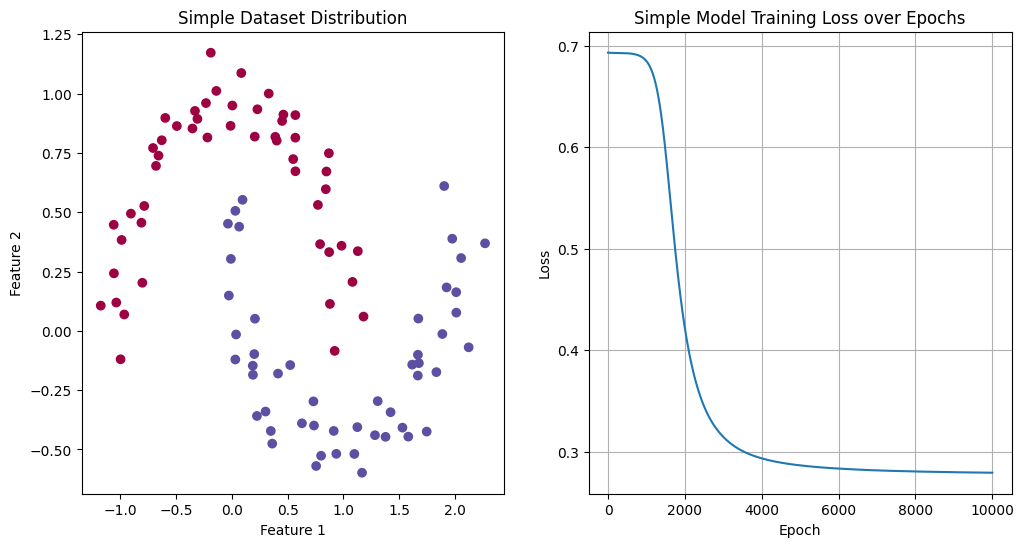

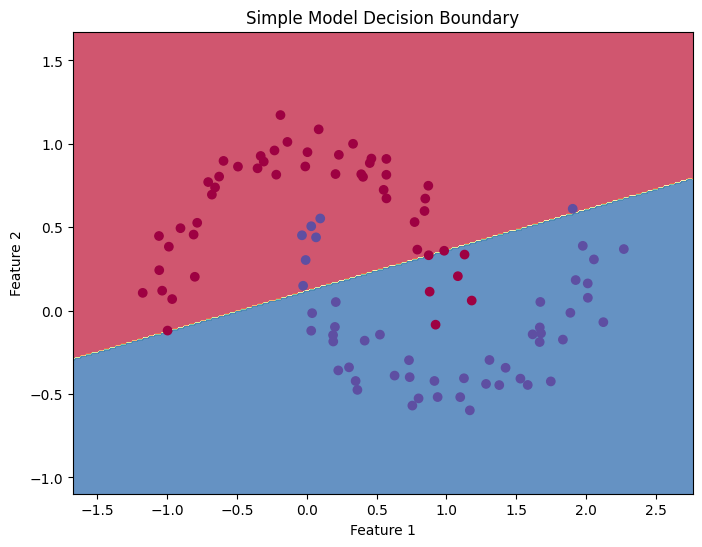

In [22]:
# 2. Create a scatter plot of the simple dataset X, coloring the points based on the true labels y.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # Create a subplot for the data scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("Simple Dataset Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# 3. Plot the training loss stored in losses_simple over the training epochs.
plt.subplot(1, 2, 2) # Create a subplot for the loss plot
plt.plot(losses_simple)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Simple Model Training Loss over Epochs")
plt.grid(True)

# 4. Create a meshgrid of points to cover the feature space of the simple dataset.
# 5. Use the predict_simple function to predict the class for each point in the meshgrid.
# 6. Plot the decision boundary by creating a contour plot of the predicted classes on the meshgrid.
# 7. Overlay the scatter plot of the original data points on the decision boundary plot.
# 8. Add appropriate titles and labels to both plots.
# 9. Display both plots using plt.show().

# Define the bounds of the meshgrid
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01 # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the function value for the whole grid
Z = predict_simple(np.c_[xx.ravel(), yy.ravel()], parameters_simple)
Z = Z.reshape(xx.shape)

# Plot the contour and the data points
plt.figure(figsize=(8, 6)) # New figure for the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("Simple Model Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Summary:

### Data Analysis Key Findings

*   A simple dataset with 100 samples and 2 features, representing two classes, was successfully generated using `make_moons`.
*   A simple two-layer neural network was initialized with random weights and zero biases. The input layer has 2 units, the hidden layer has 5 units, and the output layer has 2 units.
*   The Sigmoid and ReLU activation functions were implemented from scratch.
*   The forward propagation process for the simple network was implemented, including linear transformations and ReLU/Softmax activations.
*   The binary cross-entropy loss function was implemented to calculate the difference between predicted probabilities and true labels.
*   The backward propagation process was implemented to calculate gradients for weights and biases.
*   A basic Stochastic Gradient Descent (SGD) update rule was implemented to adjust network parameters based on gradients and a learning rate.
*   The simple model was trained for 10,000 epochs with a learning rate of 0.01. The training loss decreased significantly over time, indicating learning.
*   The trained simple model achieved an accuracy of 88.00% on the training dataset.
*   Visualizations were generated showing the distribution of the simple dataset, the decrease in training loss over epochs, and the learned decision boundary of the model.

### Insights or Next Steps

*   The successful training and evaluation of the simple network from scratch demonstrate the core concepts of neural networks.
*   The visualization of the decision boundary provides a clear understanding of how the simple model separates the two classes in the feature space.
